<a href="https://colab.research.google.com/github/SameerR007/TomORJerryCNN/blob/main/TomVSJerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TOM or JERRY Classification using CNN

In [38]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [39]:
!kaggle datasets download -d balabaskar/tom-and-jerry-image-classification

 99% 431M/435M [00:13<00:00, 38.1MB/s]
100% 435M/435M [00:13<00:00, 33.4MB/s]


In [ ]:
! unzip /content/tom-and-jerry-image-classification.zip

In [42]:
directory="/content/tom_and_jerry/tom_and_jerry/"

In [43]:
import cv2
import os
categories=['jerry','tom']

In [44]:
data_train=[]
data_valid=[]
for category in categories:
  paths=directory+category
  l=len(os.listdir(paths))
  t=int(l*.8)
  v=l-t
  i=1
  for path in os.listdir(paths):
      source=paths+"/"+path
      img=cv2.imread(source)      
      img=cv2.resize(img,(128,128))
      label=categories.index(category)
      if(i<=t):
        data_train.append([img,label])
      else:
        data_valid.append([img,label])
      i=i+1
  

In [45]:
data_train[0][0].shape

(128, 128, 3)

In [46]:
import random
random.shuffle(data_train)
random.shuffle(data_valid)

In [47]:
x_train=[]
y_train=[]
x_valid=[]
y_valid=[]
for a,b in data_train:
  x_train.append(a)
  y_train.append(b)
for a,b in data_valid:
  x_valid.append(a)
  y_valid.append(b)

In [48]:
y_train

[0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [49]:
x_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [50]:
import numpy as np
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_valid=np.asarray(x_valid)
y_valid=np.asarray(y_valid)

In [51]:
x_train.shape

(2536, 128, 128, 3)

In [52]:
x_train=x_train/255.0
x_valid=x_valid/255.0

In [53]:
y_train.shape

(2536,)

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        mode="max", patience=5,
                                        restore_best_weights=True)
model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid),callbacks=[earlystopping])

Epoch 1/50
80/80 [==============================] - 5s 36ms/step - loss: 0.5961 - accuracy: 0.6632 - val_loss: 0.4104 - val_accuracy: 0.8076
Epoch 2/50
80/80 [==============================] - 2s 21ms/step - loss: 0.3658 - accuracy: 0.8525 - val_loss: 0.3310 - val_accuracy: 0.8486
Epoch 3/50
80/80 [==============================] - 2s 22ms/step - loss: 0.2690 - accuracy: 0.8955 - val_loss: 0.2154 - val_accuracy: 0.9211
Epoch 4/50
80/80 [==============================] - 2s 23ms/step - loss: 0.1432 - accuracy: 0.9503 - val_loss: 0.2158 - val_accuracy: 0.9148
Epoch 5/50
80/80 [==============================] - 2s 21ms/step - loss: 0.0879 - accuracy: 0.9677 - val_loss: 0.1519 - val_accuracy: 0.9479
Epoch 6/50
80/80 [==============================] - 2s 21ms/step - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.1721 - val_accuracy: 0.9416
Epoch 7/50
80/80 [==============================] - 2s 22ms/step - loss: 0.0450 - accuracy: 0.9823 - val_loss: 0.2289 - val_accuracy: 0.9338
Epoch 8/50
80

In [93]:
model.save('model.h5')

In [94]:



test_img=cv2.imread("tom.jpeg")

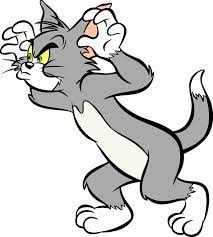

In [95]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_img)

In [96]:
test_img=test_img/255.0
test_img = cv2.resize(test_img,(128,128))

In [97]:
test_input = test_img.reshape(-1,128,128,3)

In [98]:
test_input.shape

(1, 128, 128, 3)

In [101]:
pred=model.predict(test_input)
print(categories[round(pred[0][0])])

1/1 [==============================] - 0s 18ms/step
tom
